In [955]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [956]:
# Load the dataset
rawdata = pd.read_csv(r'E:\Users\Documents\College\Engineering\S.Y. Eng\Machine Learning\SMS-Data.csv')

In [957]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100243 entries, 0 to 100242
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   phoneNumber    100243 non-null  object
 1   id             100243 non-null  object
 2   updateAt       100243 non-null  object
 3   senderAddress  100243 non-null  object
 4   text           100237 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [1030]:
data_dup = rawdata.drop_duplicates()
data = data_dup.dropna()
data.head()

,phoneNumber,id,updateAt,senderAddress,text
0,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,"Sat, 7 May 2022 19:48:00 UTC",JK-SmplPL,Rs.95.15 on Zomato charged via Simpl.\r\n--\r\...
1,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,"Sat, 7 May 2022 19:48:00 UTC",VP-ViCARE,Hi! Update your email id through WhatsApp: htt...
2,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,"Sat, 7 May 2022 19:48:00 UTC",VP-612345,Lucknow ya Kolkata ? - watch it LIVE with Vi c...
3,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,"Sat, 7 May 2022 19:48:00 UTC",BP-ACKOGI,"Mohd,\nCheck the incredible Acko insurance pol..."
4,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,"Sat, 7 May 2022 19:48:00 UTC",VP-ViCARE,Hi! You can now get your Vi prepaid invoice em...


In [959]:
# translator = Translator()
# data['Translated_SMS'] = data["text"].apply(lambda x: translator.translate(x, src='hi', dest='en').text)

In [960]:
# Step 1: Inspect the dataset
print("Dataset Overview:")
print(data.info())
print("\nSample Messages:")
print(data['text'].head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 83280 entries, 0 to 100238
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   phoneNumber    83280 non-null  object
 1   id             83280 non-null  object
 2   updateAt       83280 non-null  object
 3   senderAddress  83280 non-null  object
 4   text           83280 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB
None

Sample Messages:
0    Rs.95.15 on Zomato charged via Simpl.\r\n--\r\...
1    Hi! Update your email id through WhatsApp: htt...
2    Lucknow ya Kolkata ? - watch it LIVE with Vi c...
3    Mohd,\nCheck the incredible Acko insurance pol...
4    Hi! You can now get your Vi prepaid invoice em...
Name: text, dtype: object


In [961]:
# Step 2: Preprocess the text
def preprocess_text(text):
    # Remove URLs, special characters, and numbers
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.lower()

def preprocess_sender(text):
    text = text[3:]
    return text.lower()

# def preprocess_sender(text):
#     # Remove anything before the first hyphen '-')
#     text = re.sub(r'^[^-]+-', '', text)
#     return text.lower()


# # Remove dynamic prefix (anything before the first hyphen '-')
# data['cleaned_sender'] = data['senderAddress'].str.replace(r'^[^-]+-', '', regex=True)

# # Display the updated dataframe
# data.head()


In [1034]:
# Apply preprocessing
data['cleaned_body'] = data['text']

data['cleaned_sender'] = data['senderAddress'].apply(preprocess_sender)

In [963]:
df_filtered = data[~data['cleaned_sender'].str.contains(r'\b\d{10}\b', na=False)]
cleaned_text = df_filtered['text'].apply(preprocess_text)
df_filtered.head()

,phoneNumber,id,updateAt,senderAddress,text,cleaned_body,cleaned_sender
0,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,"Sat, 7 May 2022 19:48:00 UTC",JK-SmplPL,Rs.95.15 on Zomato charged via Simpl.\r\n--\r\...,Rs.95.15 on Zomato charged via Simpl.\r\n--\r\...,smplpl
1,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,"Sat, 7 May 2022 19:48:00 UTC",VP-ViCARE,Hi! Update your email id through WhatsApp: htt...,Hi! Update your email id through WhatsApp: htt...,vicare
2,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,"Sat, 7 May 2022 19:48:00 UTC",VP-612345,Lucknow ya Kolkata ? - watch it LIVE with Vi c...,Lucknow ya Kolkata ? - watch it LIVE with Vi c...,612345
3,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,"Sat, 7 May 2022 19:48:00 UTC",BP-ACKOGI,"Mohd,\nCheck the incredible Acko insurance pol...","Mohd,\nCheck the incredible Acko insurance pol...",ackogi
4,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,"Sat, 7 May 2022 19:48:00 UTC",VP-ViCARE,Hi! You can now get your Vi prepaid invoice em...,Hi! You can now get your Vi prepaid invoice em...,vicare


In [964]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76005 entries, 0 to 100238
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   phoneNumber     76005 non-null  object
 1   id              76005 non-null  object
 2   updateAt        76005 non-null  object
 3   senderAddress   76005 non-null  object
 4   text            76005 non-null  object
 5   cleaned_body    76005 non-null  object
 6   cleaned_sender  76005 non-null  object
dtypes: object(7)
memory usage: 4.6+ MB


In [965]:
# Step 3: Visualize word frequencies
vectorizer = CountVectorizer(stop_words='english', max_features=50)
X = vectorizer.fit_transform(df_filtered['cleaned_sender'])

In [966]:
# Create a DataFrame for visualization
word_freq = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'frequency': X.toarray().sum(axis=0)
})

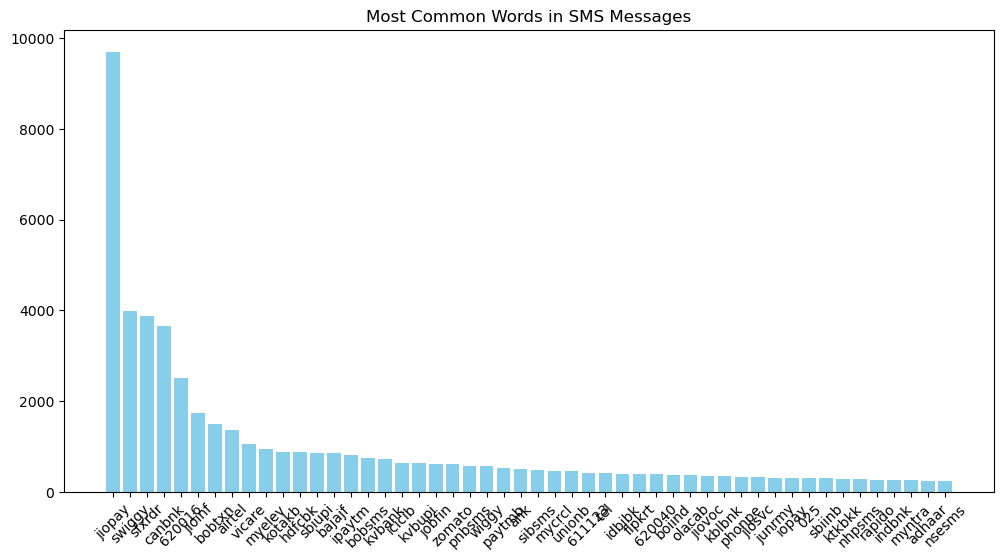

In [967]:
# Plot the most common words
word_freq = word_freq.sort_values(by='frequency', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(word_freq['word'], word_freq['frequency'], color='skyblue')
plt.title('Most Common Words in SMS Messages')
plt.xticks(rotation=45)
plt.show()

In [968]:
df_filtered['date'] = pd.to_datetime(df_filtered['updateAt'], format="%a, %d %b %Y %H:%M:%S %Z")

In [969]:
df_filtered['date']

0        2022-05-07 19:48:00+00:00
1        2022-05-07 19:48:00+00:00
2        2022-05-07 19:48:00+00:00
3        2022-05-07 19:48:00+00:00
4        2022-05-07 19:48:00+00:00
                    ...           
100224   2022-05-04 07:14:44+00:00
100227   2022-05-04 07:14:44+00:00
100234   2022-05-04 07:14:44+00:00
100236   2022-05-04 07:14:44+00:00
100238   2022-05-04 07:14:44+00:00
Name: date, Length: 76005, dtype: datetime64[ns, UTC]

In [970]:
df_filtered.head()

,phoneNumber,id,updateAt,senderAddress,text,cleaned_body,cleaned_sender,date
0,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,"Sat, 7 May 2022 19:48:00 UTC",JK-SmplPL,Rs.95.15 on Zomato charged via Simpl.\r\n--\r\...,Rs.95.15 on Zomato charged via Simpl.\r\n--\r\...,smplpl,2022-05-07 19:48:00+00:00
1,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,"Sat, 7 May 2022 19:48:00 UTC",VP-ViCARE,Hi! Update your email id through WhatsApp: htt...,Hi! Update your email id through WhatsApp: htt...,vicare,2022-05-07 19:48:00+00:00
2,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,"Sat, 7 May 2022 19:48:00 UTC",VP-612345,Lucknow ya Kolkata ? - watch it LIVE with Vi c...,Lucknow ya Kolkata ? - watch it LIVE with Vi c...,612345,2022-05-07 19:48:00+00:00
3,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,"Sat, 7 May 2022 19:48:00 UTC",BP-ACKOGI,"Mohd,\nCheck the incredible Acko insurance pol...","Mohd,\nCheck the incredible Acko insurance pol...",ackogi,2022-05-07 19:48:00+00:00
4,xx39973810,baa1668c-049e-4118-938e-cc804f1e73aa,"Sat, 7 May 2022 19:48:00 UTC",VP-ViCARE,Hi! You can now get your Vi prepaid invoice em...,Hi! You can now get your Vi prepaid invoice em...,vicare,2022-05-07 19:48:00+00:00


In [971]:
unique_senders_count = df_filtered['cleaned_sender'].nunique()
print(f"Total unique senders: {unique_senders_count}")

# Count occurrences of each sender
sender_counts = df_filtered['cleaned_sender'].value_counts()
print("\nSender Counts:")

Total unique senders: 3266

Sender Counts:


In [1031]:
sender_counts.head()

cleaned_sender
jiopay    9692
swiggy    3981
sfxrdr    3871
canbnk    3660
620016    2517
Name: count, dtype: int64

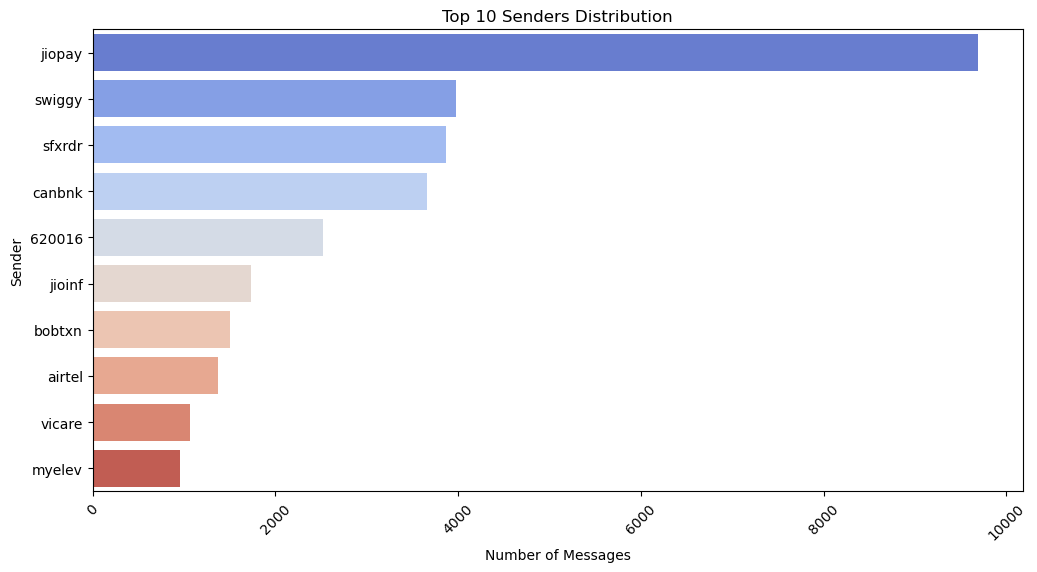

In [973]:
plt.figure(figsize=(12, 6))
sns.countplot(y='cleaned_sender', data=df_filtered, order=df_filtered['cleaned_sender'].value_counts().head(10).index, palette='coolwarm')

# Customize the plot
plt.title('Top 10 Senders Distribution')
plt.xlabel('Number of Messages')
plt.ylabel('Sender')
plt.xticks(rotation=45)
plt.show()

In [974]:
# data['cleaned_sender'] = data['senderAddress'].str.replace(r'^[^-]+-', '', regex=True)

In [1036]:
keywords = r'\b(bank|bnk|b|bk|upi|paytm|sbi|bob)\b'
bank_senders = data[data['cleaned_sender'].str.contains(keywords, case=False, na=False)]

bank_senders.head()

,phoneNumber,id,updateAt,senderAddress,text,cleaned_body,cleaned_sender
126,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,"Tue, 3 May 2022 08:53:39 UTC",ATMSBI,"Dear SBI Customer, transaction dated 29-Apr-22...","Dear SBI Customer, transaction dated 29-Apr-22...",sbi
1542,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,"Tue, 3 May 2022 08:53:39 UTC",INDBNK,"SMS ""BLOCK"" to +91-9289592895 to block all dig...","SMS ""BLOCK"" to +91-9289592895 to block all dig...",bnk
2149,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,"Wed, 4 May 2022 08:57:58 UTC",ATMSBI,"Dear SBI Customer, transaction dated 29-Apr-22...","Dear SBI Customer, transaction dated 29-Apr-22...",sbi
3565,xx80368198,af5cdc15-98d7-40c6-a85d-f8bd7ee8f5e9,"Wed, 4 May 2022 08:57:58 UTC",INDBNK,"SMS ""BLOCK"" to +91-9289592895 to block all dig...","SMS ""BLOCK"" to +91-9289592895 to block all dig...",bnk
18674,xx69382284,7dd75191-1d5e-4946-a09e-d9b118f5ffa7,"Tue, 10 May 2022 12:38:07 UTC",SBIUPI,"Dear SBI User, your A/c X1577-debited by Rs260...","Dear SBI User, your A/c X1577-debited by Rs260...",upi


In [976]:
bank_senders["cleaned_sender"].value_counts()

cleaned_sender
upi      25
bnk      14
sbi       4
paytm     2
Name: count, dtype: int64

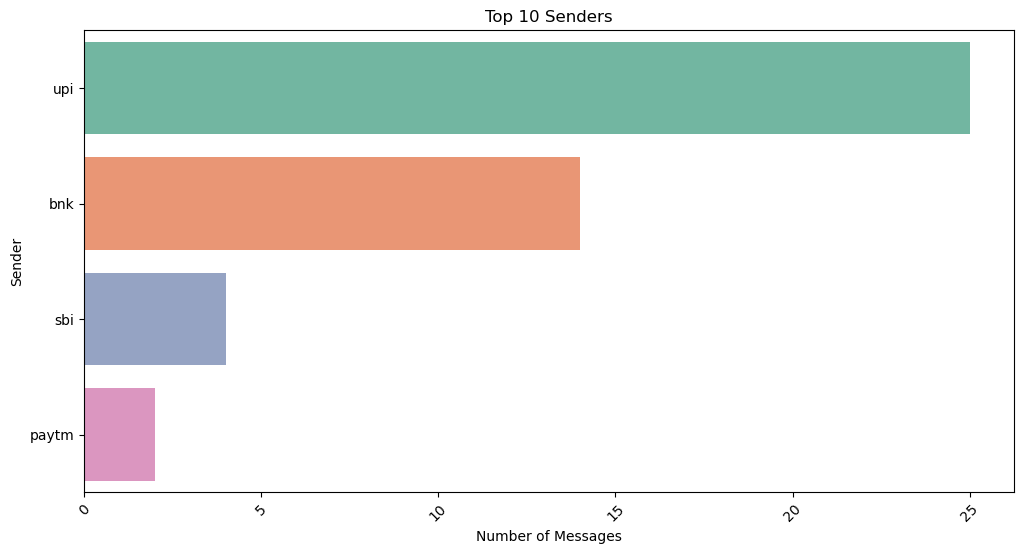

In [977]:
plt.figure(figsize=(12, 6))
sns.countplot(y='cleaned_sender', data=bank_senders, order=bank_senders['cleaned_sender'].value_counts().head(10).index, palette='Set2')

# Customizing the plot
plt.title('Top 10 Senders')
plt.xlabel('Number of Messages')
plt.ylabel('Sender')
plt.xticks(rotation=45)
plt.show()

In [978]:
# Step 3: Visualize word frequencies
vectorizer = CountVectorizer(stop_words='english', max_features=50)
X = vectorizer.fit_transform(bank_senders['cleaned_sender'])

In [979]:
# Create a DataFrame for visualization
word_freq = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'frequency': X.toarray().sum(axis=0)
})

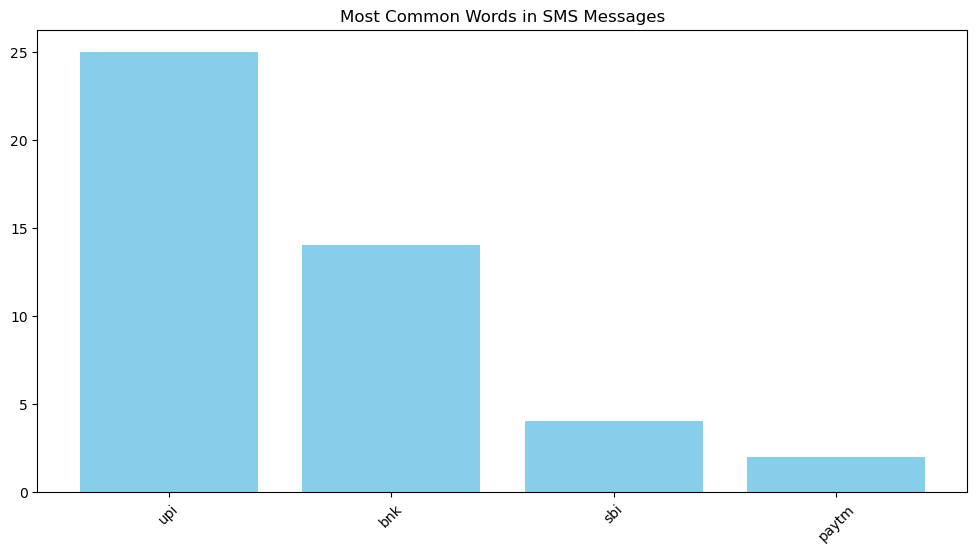

In [980]:
# Plot the most common words
word_freq = word_freq.sort_values(by='frequency', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(word_freq['word'], word_freq['frequency'], color='skyblue')
plt.title('Most Common Words in SMS Messages')
plt.xticks(rotation=45)
plt.show()

In [981]:
# df_filtered.loc[8551]

df_filtered.info()
df_filtered.to_csv('cleaned_data.csv')


<class 'pandas.core.frame.DataFrame'>
Index: 76005 entries, 0 to 100238
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   phoneNumber     76005 non-null  object             
 1   id              76005 non-null  object             
 2   updateAt        76005 non-null  object             
 3   senderAddress   76005 non-null  object             
 4   text            76005 non-null  object             
 5   cleaned_body    76005 non-null  object             
 6   cleaned_sender  76005 non-null  object             
 7   date            76005 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(7)
memory usage: 5.2+ MB


In [982]:
df_filtered['phoneNumber'].value_counts()

phoneNumber
xx31026369    5965
xx79004549    4790
xx17054730    3639
xx75313460    2963
xx66303163    2808
              ... 
xx99546752       5
xx48824947       4
xx77816088       2
xx72096136       2
xx77998997       1
Name: count, Length: 93, dtype: int64

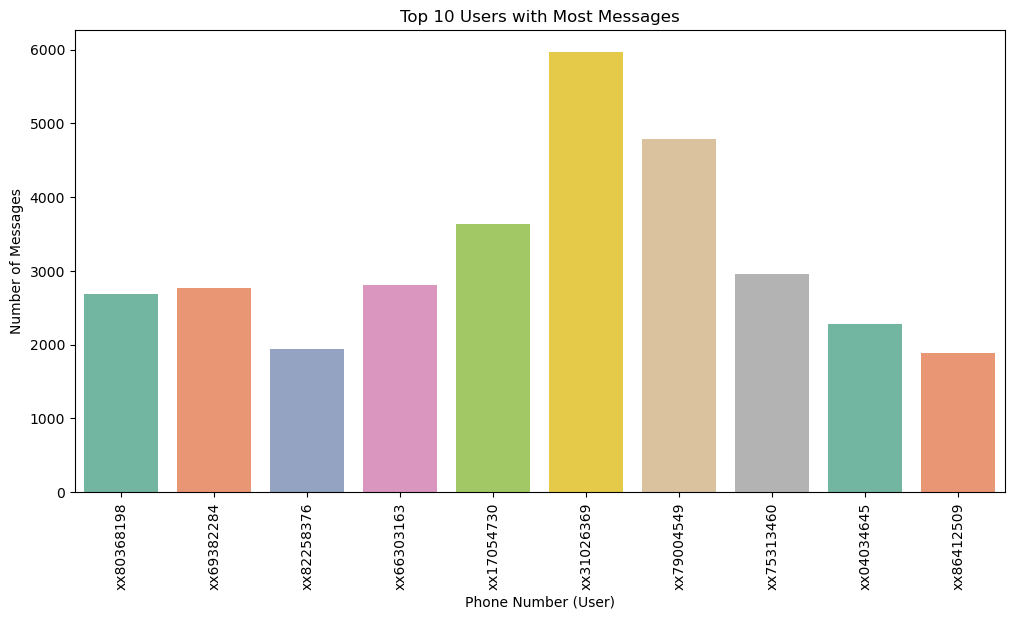

In [983]:
# Displaying only top 10 users
top_users = df_filtered['phoneNumber'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.countplot(x='phoneNumber', data=df_filtered[df_filtered['phoneNumber'].isin(top_users)], palette='Set2')

# Customizing the plot
plt.title('Top 10 Users with Most Messages')
plt.xlabel('Phone Number (User)')
plt.ylabel('Number of Messages')
plt.xticks(rotation=90)
plt.show()


In [1037]:
grouped = df_filtered.groupby('phoneNumber')

# Print each group separately
# for user, group in grouped:
#     print(f"Messages for User: {user}")
#     print(pd.DataFrame(group))
#     print("-" * 50)

# Create a summary DataFrame
# summary = grouped.agg({
#     'cleaned_sender': 'count',  # Count of messages
#     'cleaned_body': lambda x: ' | '.join(x)  # Combine SMS text into a single column
# }).reset_index()

# summary.rename(columns={'cleaned_sender': 'MessageCount', 'cleaned_body': 'AllMessages'}, inplace=True)

# # Display the summary DataFrame
# print("Summary DataFrame:")
# print(summary)

# Optional: Filter users with multiple messages
# multi_message_users = grouped.filter(lambda x: len(x) > 1)

# print("\nUsers with multiple messages:")
# print(multi_message_users)

In [985]:
bank_keywords = r'\b(bank|bnk|b|bk|upi|paytm|sbi|bob)\b'

# Add a column to flag bank-related messages
df_filtered['IsBankRelated'] = df_filtered['cleaned_sender'].str.contains(bank_keywords, case=False, na=False) | \
                      df_filtered['cleaned_body'].str.contains(bank_keywords, case=False, na=False)

# Group by UserNumber and categorize bank-related and non-bank-related messages
grouped = df_filtered.groupby('phoneNumber')

# Categorize messages
categorized = grouped.apply(lambda group: {
    'BankRelated': group[group['IsBankRelated']].to_dict(orient='records'),
    'NonBankRelated': group[~group['IsBankRelated']].to_dict(orient='records')
}).reset_index(name='CategorizedMessages')

# Display categorized messages
print(categorized)

   phoneNumber                                CategorizedMessages
0   xx00113290  {'BankRelated': [{'phoneNumber': 'xx00113290',...
1   xx00674014  {'BankRelated': [{'phoneNumber': 'xx00674014',...
2   xx01310497  {'BankRelated': [{'phoneNumber': 'xx01310497',...
3   xx02914014  {'BankRelated': [], 'NonBankRelated': [{'phone...
4   xx04034645  {'BankRelated': [{'phoneNumber': 'xx04034645',...
..         ...                                                ...
88  xx92894428  {'BankRelated': [{'phoneNumber': 'xx92894428',...
89  xx92978041  {'BankRelated': [{'phoneNumber': 'xx92978041',...
90  xx94541847  {'BankRelated': [{'phoneNumber': 'xx94541847',...
91  xx99040324  {'BankRelated': [{'phoneNumber': 'xx99040324',...
92  xx99546752  {'BankRelated': [], 'NonBankRelated': [{'phone...

[93 rows x 2 columns]


In [986]:
categorized.to_json('categorized_messages.json', orient='records', indent=2)

In [987]:
output_rows = []

for user_number, group in grouped:
    bank_related = group[group['IsBankRelated']]
    non_bank_related = group[~group['IsBankRelated']]
    
    for _, row in bank_related.iterrows():
        output_rows.append({
            'UserNumber': user_number,
            'Category': 'BankRelated',
            'cleaned_sender': row['cleaned_sender'],
            'cleaned_body': row['cleaned_body']
        })
    
    for _, row in non_bank_related.iterrows():
        output_rows.append({
            'UserNumber': user_number,
            'Category': 'NonBankRelated',
            'cleaned_sender': row['cleaned_sender'],
            'cleaned_body': row['cleaned_body']
        })

# Create a DataFrame for the output
output_df = pd.DataFrame(output_rows)

In [988]:
# Save to Excel
output_df.to_excel('categorized_messages.xlsx', index=False)

print("Data has been successfully saved to 'categorized_messages.xlsx'.")

Data has been successfully saved to 'categorized_messages.xlsx'.


In [989]:
output_df

,UserNumber,Category,cleaned_sender,cleaned_body
0,xx00113290,BankRelated,kotaka,Instant digital savings bank account for you!\...
1,xx00113290,BankRelated,idbibk,"Dear Customer, It may be noted that Missed Cal..."
2,xx00113290,BankRelated,idbibk,Your a/c no. XXXXXXXXXXXX9204 is debited for R...
3,xx00113290,BankRelated,idbibk,IDBI Bank A/c NN79204 debited for INR 160.00 t...
4,xx00113290,BankRelated,idbibk,IDBI Bank A/C NN79204 credited INR. 3670.92 De...
...,...,...,...,...
76000,xx99546752,NonBankRelated,swiggy,Your order #135072886420 was delivered superfa...
76001,xx99546752,NonBankRelated,sfxrdr,<#> Shadowfax Id is 154890864 6gW4yAjEoWG
76002,xx99546752,NonBankRelated,swiggy,Use OTP 415636 to log into your Swiggy account...
76003,xx99546752,NonBankRelated,vicare,Don't miss on all the LIVE T20 Cricket action!...


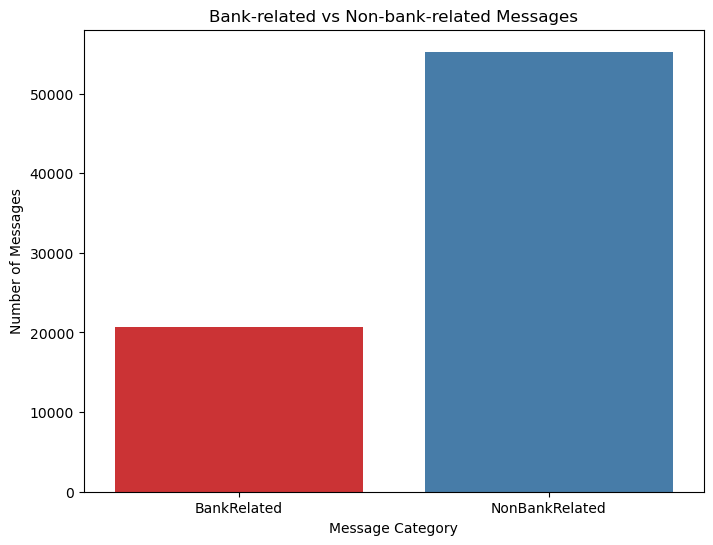

In [990]:
# Create the count plot for bank-related vs non-bank-related messages
plt.figure(figsize=(8, 6))

# Count plot based on the 'Category' column
sns.countplot(x='Category', data=output_df, palette='Set1')

# Customizing the plot
plt.title('Bank-related vs Non-bank-related Messages')
plt.xlabel('Message Category')
plt.ylabel('Number of Messages')
plt.show()


# 1st Try with different keywords

In [991]:
# Keywords to identify transactions
credit_keywords = r'\b(credited|added)\b'
debit_keywords = r'\b(debited|charged|withdrawn|sent)\b'

# credit_keywords = r'\b(credited|added|deposited|received)\b'
# debit_keywords = r'\b(debited|charged|withdrawn|paid|spent)\b'

# Function to extract transaction details
def extract_transaction_details(sms):
    amount_pattern = r'Rs\.?\s?(\d+\.?\d*)'  # Regex to find amounts like Rs.95.15 or Rs 95
    amount_match = re.search(amount_pattern, sms)
    
    if amount_match:
        amount = float(amount_match.group(1))
        if re.search(credit_keywords, sms, re.IGNORECASE):
            return "credit", amount
        elif re.search(debit_keywords, sms, re.IGNORECASE):
            return "debit", amount
    return None, 0

# Extract transaction type and amount
df_filtered[['TransactionType', 'Amount']] = df_filtered['cleaned_body'].apply(lambda sms: pd.Series(extract_transaction_details(sms)))

# Filter bank-related messages and calculate totals
bank_related = df_filtered[df_filtered['TransactionType'].notnull()]
summary = bank_related.groupby('phoneNumber').agg(
    TotalCredits=('Amount', lambda x: x[bank_related['TransactionType'] == 'credit'].sum()),
    TotalDebits=('Amount', lambda x: x[bank_related['TransactionType'] == 'debit'].sum())
).reset_index()

print(summary)

   phoneNumber  TotalCredits  TotalDebits
0   xx00113290     100783.00         0.00
1   xx00674014          0.00        15.00
2   xx01310497     196997.00      9182.45
3   xx04034645      73462.33     52752.78
4   xx04401562      53592.00     83328.00
..         ...           ...          ...
76  xx90595970          1.00       387.86
77  xx92894428      19953.50     81201.80
78  xx92978041       9350.06         0.00
79  xx94541847      26132.80      1030.00
80  xx99040324      74915.07    144949.80

[81 rows x 3 columns]


In [992]:
# Group by userNumber to find max credit and debit for each user
user_transactions = summary.groupby('phoneNumber').agg(
    max_credit=('TotalCredits', 'max'),
    max_debit=('TotalDebits', 'max')
).reset_index()

# Add a column for the highest transaction per user (either credit or debit)
user_transactions['highest_transaction'] = user_transactions[['max_credit', 'max_debit']].max(axis=1)

# Find the user with the highest transaction
highest_transaction_user = user_transactions.loc[user_transactions['highest_transaction'].idxmax()]

In [993]:
# Display the user with the highest transaction
print("User with highest transaction:")
print(highest_transaction_user)
summary[summary['phoneNumber'] == "xx84596171"]

User with highest transaction:
phoneNumber            xx84596171
max_credit              923826.93
max_debit                14174.72
highest_transaction     923826.93
Name: 70, dtype: object


,phoneNumber,TotalCredits,TotalDebits
70,xx84596171,923826.93,14174.72


In [994]:
print("Total Credited", summary['TotalCredits'].sum())
print("Total Debited", summary['TotalDebits'].sum())

Total Credited 4221806.930000001
Total Debited 2836194.87


# 2nd Try with different keywords

In [995]:
# Keywords to identify transactions
# credit_keywords = r'\b(credited|added)\b'
# debit_keywords = r'\b(debited|charged|withdrawn)\b'

credit_keywords = r'\b(credited|added|deposited|received)\b'
debit_keywords = r'\b(debited|charged|withdrawn|paid|spent|sent)\b'

# Function to extract transaction details
def extract_transaction_details(sms):
    amount_pattern = r'Rs\.?\s?(\d+\.?\d*)'  # Regex to find amounts like Rs.95.15 or Rs 95
    amount_match = re.search(amount_pattern, sms)
    
    if amount_match:
        amount = float(amount_match.group(1))
        if re.search(credit_keywords, sms, re.IGNORECASE):
            return "credit", amount
        elif re.search(debit_keywords, sms, re.IGNORECASE):
            return "debit", amount
    return None, 0

# Extract transaction type and amount
df_filtered[['TransactionType', 'Amount']] = df_filtered['cleaned_body'].apply(lambda sms: pd.Series(extract_transaction_details(sms)))

# Filter bank-related messages and calculate totals
bank_related = df_filtered[df_filtered['TransactionType'].notnull()]
summary2 = bank_related.groupby('phoneNumber').agg(
    TotalCredits=('Amount', lambda x: x[bank_related['TransactionType'] == 'credit'].sum()),
    TotalDebits=('Amount', lambda x: x[bank_related['TransactionType'] == 'debit'].sum())
).reset_index()

print(summary2)

   phoneNumber  TotalCredits  TotalDebits
0   xx00113290     100783.00         0.00
1   xx00674014          0.00      5693.00
2   xx01310497     196997.00      9195.45
3   xx04034645      81898.59     52756.78
4   xx04401562     107755.00     83528.00
..         ...           ...          ...
76  xx90595970       5257.83      3465.16
77  xx92894428      22478.50     81541.80
78  xx92978041       9350.06         0.00
79  xx94541847      81647.80      1269.00
80  xx99040324     229580.04    162626.80

[81 rows x 3 columns]


In [996]:
# Group by userNumber to find max credit and debit for each user
user_transactions = summary2.groupby('phoneNumber').agg(
    max_credit=('TotalCredits', 'max'),
    max_debit=('TotalDebits', 'max')
).reset_index()

# Add a column for the highest transaction per user (either credit or debit)
user_transactions['highest_transaction'] = user_transactions[['max_credit', 'max_debit']].max(axis=1)

# Find the user with the highest transaction
highest_transaction_user = user_transactions.loc[user_transactions['highest_transaction'].idxmax()]

In [997]:
# Display the user with the highest transaction
print("User with highest transaction:")
print(highest_transaction_user)

User with highest transaction:
phoneNumber            xx84596171
max_credit              923826.93
max_debit                16034.72
highest_transaction     923826.93
Name: 70, dtype: object


In [998]:
summary2[summary2['phoneNumber'] == "xx84596171"]

,phoneNumber,TotalCredits,TotalDebits
70,xx84596171,923826.93,16034.72


In [999]:
print("Total Credited", summary2['TotalCredits'].sum())
print("Total Debited", summary2['TotalDebits'].sum())

Total Credited 5048080.08
Total Debited 4366163.1


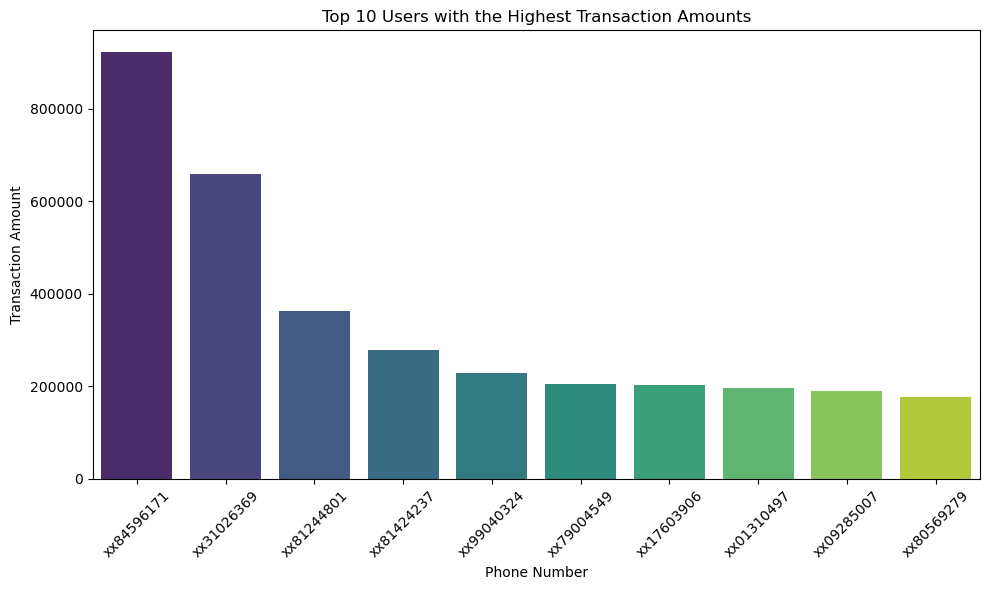

In [1000]:
user_transactions_sorted = user_transactions.sort_values(by='highest_transaction', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='phoneNumber', y='highest_transaction', data=user_transactions_sorted.head(10), palette='viridis')

# Adding titles and labels
plt.title('Top 10 Users with the Highest Transaction Amounts')
plt.xlabel('Phone Number')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Display the plot
plt.tight_layout()
plt.show()

In [1001]:

# Define function to extract loan-related data
def is_running_loan(message):
    # Loan-related keywords
    loan_keywords = r'\b(loan|EMI|outstanding|overdue|due)\b'
    debit_keywords = r'\b(debit|debited|repayment|installment|EMI|sent)\b'

    # Check if the message is loan-related
    if re.search(loan_keywords, message, re.IGNORECASE):
        # Check for debit-related keywords to confirm it's a running loan
        if re.search(debit_keywords, message, re.IGNORECASE):
            return True
    return False

# Apply the function to the bank-related messages
df_filtered['is_running_loan'] = df_filtered['cleaned_body'].apply(is_running_loan)

# Filter rows with current running loans
running_loans = df_filtered[df_filtered['is_running_loan']]

# Extract loan amounts from these messages (if available)
def extract_loan_amount(message):
    # Extract monetary amounts
    amounts = re.findall(r'Rs\.?\s?(\d+\.?\d*)', message)
    # Convert to float and return the sum
    return sum([float(amount.replace(',', '')) for amount in amounts]) if amounts else 0

running_loans['loan_amount'] = running_loans['cleaned_body'].apply(extract_loan_amount)

# Group by user to calculate the total running loan amount
loan_summary = running_loans.groupby('phoneNumber')['loan_amount'].sum().reset_index()

# Display the loan summary
print(loan_summary)

# Optionally, save the result to Excel
loan_summary.to_excel('running_loan_summary.xlsx', index=False)
loan_summary.to_csv('running_loan_summary.csv', index=False)


   phoneNumber  loan_amount
0   xx01310497         0.00
1   xx04034645    754666.00
2   xx04401562     18933.00
3   xx05407636     15687.00
4   xx05814042      5100.00
5   xx05992608         0.00
6   xx06555706       140.00
7   xx07558929    110815.89
8   xx08171361      1003.00
9   xx08965418         0.00
10  xx09285007     30749.66
11  xx09432501     24501.00
12  xx10044463     88516.00
13  xx14311304         0.00
14  xx17054730         0.00
15  xx17603906    202238.00
16  xx19422042     78413.00
17  xx20562981      3614.00
18  xx21025322         2.00
19  xx31026369    191107.00
20  xx52580389         0.00
21  xx52892129      3489.00
22  xx52988075         0.00
23  xx66303163     16099.84
24  xx68838956         0.00
25  xx69382284    353447.00
26  xx69829544     11811.75
27  xx70848155      3448.76
28  xx71874144      4434.00
29  xx73660424       990.00
30  xx74020648         0.00
31  xx74031530      2000.00
32  xx75313460     67892.00
33  xx78882648         0.00
34  xx79004549    29

In [1002]:
# Group by userNumber to find max credit and debit for each user
user_transactions = loan_summary.groupby('phoneNumber').agg(
    max_loan=('loan_amount', 'max'),
).reset_index()

# Add a column for the highest transaction per user (either credit or debit)
user_transactions['highest_transaction'] = user_transactions[['max_loan']].max(axis=1)

# Find the user with the highest transaction
highest_loan_user = user_transactions.loc[user_transactions['highest_transaction'].idxmax()]

In [1003]:
# Display the user with the highest transaction
print("User with highest transaction:")
print(highest_loan_user)

User with highest transaction:
phoneNumber            xx04034645
max_loan                754666.00
highest_transaction     754666.00
Name: 1, dtype: object


In [1004]:
loan_summary[loan_summary['phoneNumber'] == "xx04034645"]

,phoneNumber,loan_amount
1,xx04034645,754666.00


In [1005]:
top_loan_users = loan_summary.sort_values(by='loan_amount', ascending=False).reset_index(drop=True)

# Display top users
print("Top users with highest loan amounts:")
print(top_loan_users)

Top users with highest loan amounts:
   phoneNumber  loan_amount
0   xx04034645    754666.00
1   xx83655400    368194.00
2   xx69382284    353447.00
3   xx81244801    324406.00
4   xx79004549    293264.20
5   xx89253636    256369.36
6   xx17603906    202238.00
7   xx31026369    191107.00
8   xx99040324    160051.22
9   xx07558929    110815.89
10  xx83159021    108300.00
11  xx10044463     88516.00
12  xx19422042     78413.00
13  xx75313460     67892.00
14  xx80368198     46013.00
15  xx09285007     30749.66
16  xx92894428     25700.67
17  xx09432501     24501.00
18  xx04401562     18933.00
19  xx66303163     16099.84
20  xx05407636     15687.00
21  xx81424237     12362.00
22  xx69829544     11811.75
23  xx79704208     10142.00
24  xx81767512     10000.00
25  xx94541847      9730.00
26  xx05814042      5100.00
27  xx71874144      4434.00
28  xx20562981      3614.00
29  xx52892129      3489.00
30  xx70848155      3448.76
31  xx84596171      2749.05
32  xx74031530      2000.00
33  xx08171

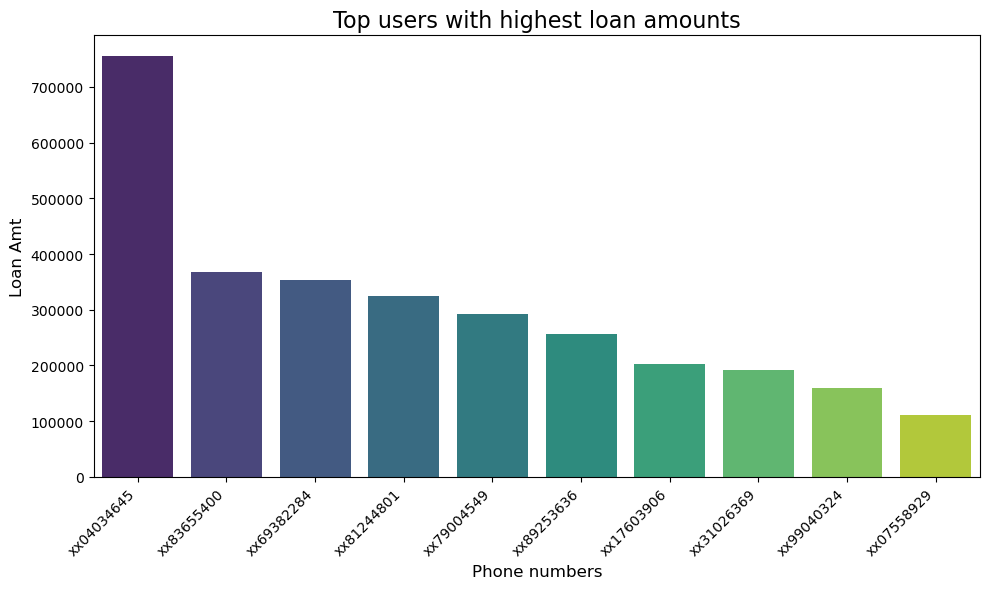

In [1006]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_loan_users["phoneNumber"].head(10), y=top_loan_users["loan_amount"].head(10), palette="viridis")
plt.title("Top users with highest loan amounts", fontsize=16)
plt.xlabel("Phone numbers", fontsize=12)
plt.ylabel("Loan Amt", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()

# sns.barplot(x=top_loan_users["phoneNumber"].head(10), y=top_loan_users["loan_amount"].head(10), palette="viridis")
# plt.Xticks(rotation=45, ha="right", fontsize=10)
# plt.show()

# 3rd try with different parameters code

In [1007]:
# Keywords for transactions
credit_keywords = r'\b(credited|added|deposited|received)\b'
debit_keywords = r'\b(debited|charged|withdrawn|paid|spent|sent)\b'
amount_pattern = r'INR\.?\s?(\d+[,.]?\d*)|Rs\.?\s?(\d+[,.]?\d*)'

# Function to classify and extract transaction details
def classify_transaction(body):
    amount_match = re.search(amount_pattern, body, re.IGNORECASE)
    if amount_match:
        amount = float(amount_match.group(1).replace(",", "") if amount_match.group(1) else amount_match.group(2).replace(",", ""))
        if re.search(credit_keywords, body, re.IGNORECASE):
            return "credit", amount
        elif re.search(debit_keywords, body, re.IGNORECASE):
            return "debit", amount
    return None, 0

# Apply the classification function
df_filtered[['TransactionType', 'Amount']] = df_filtered['cleaned_body'].apply(lambda body: pd.Series(classify_transaction(body)))

# Filter relevant rows and calculate totals by user
transaction_summary = df_filtered[df_filtered['TransactionType'].notnull()].groupby('phoneNumber').agg(
    TotalCredits=('Amount', lambda x: x[df_filtered.loc[x.index, 'TransactionType'] == 'credit'].sum()),
    TotalDebits=('Amount', lambda x: x[df_filtered.loc[x.index, 'TransactionType'] == 'debit'].sum())
).reset_index()

# Display the summarized results
transaction_summary.head()

,phoneNumber,TotalCredits,TotalDebits
0,xx00113290,155754.35,34755.22
1,xx00674014,0.00,5693.00
2,xx01310497,234166.00,20584.45
3,xx04034645,308742.09,56752.78
4,xx04401562,133613.00,83628.00


# 3rd Try with different parameters

In [1008]:
print("Total Credited", transaction_summary['TotalCredits'].sum())
print("Total Debited", transaction_summary['TotalDebits'].sum())

Total Credited 8694528.68
Total Debited 6058099.739999999


In [1009]:
# Keywords to identify transactions
credit_keywords = r'\b(credited|added|received)\b'
debit_keywords = r'\b(debited|charged|deposited|withdrawn|paid|spent|sent)\b'

# Keywords for identifying Swiggy and Zomato-related messages
swiggy_zomato_keywords = r'\b(swiggy|zomato)\b'

# Function to extract transaction details for Swiggy and Zomato
def extract_transaction_details(sms):
    amount_pattern = r'Rs\.?\s?(\d+\.?\d*)'  # Regex to find amounts like Rs.95.15 or Rs 95
    amount_match = re.search(amount_pattern, sms)
    
    if amount_match:
        amount = float(amount_match.group(1))
        if re.search(credit_keywords, sms, re.IGNORECASE):
            return "credit", amount
        elif re.search(debit_keywords, sms, re.IGNORECASE):
            return "debit", amount
    return None, 0

# Extract transaction type and amount
df_filtered[['TransactionType', 'Amount']] = df_filtered['cleaned_body'].apply(
    lambda sms: pd.Series(extract_transaction_details(sms))
)

# Filter Swiggy and Zomato messages
swiggy_zomato_related = df_filtered[
    df_filtered['cleaned_body'].str.contains(swiggy_zomato_keywords, case=False, na=False)
]

# Calculate total debits and credits for Swiggy and Zomato
swiggy_zomato_summary = swiggy_zomato_related.groupby('phoneNumber').agg(
    TotalCredits=('Amount', lambda x: x[swiggy_zomato_related['TransactionType'] == 'credit'].sum()),
    TotalDebits=('Amount', lambda x: x[swiggy_zomato_related['TransactionType'] == 'debit'].sum())
).reset_index()

# Display the summary
print(swiggy_zomato_summary)

# # Save to Excel for readability
# swiggy_zomato_summary.to_excel('swiggy_zomato_transactions.xlsx', index=False)


   phoneNumber  TotalCredits  TotalDebits
0   xx00113290      40000.00         0.00
1   xx01310497          0.00       269.00
2   xx02914014          0.00         0.00
3   xx04034645          0.00      8428.26
4   xx04401562          0.00     55443.00
..         ...           ...          ...
65  xx91889133          0.00         0.00
66  xx92894428          0.00      1365.00
67  xx94541847          0.00         0.00
68  xx99040324          0.00     14250.00
69  xx99546752          0.00         0.00

[70 rows x 3 columns]


In [1010]:
swiggy_zomato_summary[swiggy_zomato_summary['phoneNumber'] == "xx04034645"]

,phoneNumber,TotalCredits,TotalDebits
3,xx04034645,0.00,8428.26


In [1011]:
# Keywords for identifying Swiggy and Zomato-related messages
swiggy_keyword = r'\b(swiggy)\b'
zomato_keyword = r'\b(zomato)\b'

# Function to calculate transaction details
def extract_transaction_details(sms):
    amount_pattern = r'Rs\.?\s?(\d+\.?\d*)'  # Regex to find amounts like Rs.95.15 or Rs 95
    amount_match = re.search(amount_pattern, sms)
    
    if amount_match:
        amount = float(amount_match.group(1))
        if re.search(credit_keywords, sms, re.IGNORECASE):
            return "credit", amount
        elif re.search(debit_keywords, sms, re.IGNORECASE):
            return "debit", amount
    return None, 0

# Extract transaction type and amount
df_filtered[['TransactionType', 'Amount']] = df_filtered['cleaned_body'].apply(
    lambda sms: pd.Series(extract_transaction_details(sms))
)

# Filter Swiggy-related messages
swiggy_related = df_filtered[
    df_filtered['cleaned_body'].str.contains(swiggy_keyword, case=False, na=False)
]

# Filter Zomato-related messages
zomato_related = df_filtered[
    df_filtered['cleaned_body'].str.contains(zomato_keyword, case=False, na=False)
]

# Calculate totals for Swiggy
swiggy_summary = swiggy_related.groupby('phoneNumber').agg(
    SwiggyCredits=('Amount', lambda x: x[swiggy_related['TransactionType'] == 'credit'].sum()),
    SwiggyDebits=('Amount', lambda x: x[swiggy_related['TransactionType'] == 'debit'].sum())
).reset_index()

# Calculate totals for Zomato
zomato_summary = zomato_related.groupby('phoneNumber').agg(
    ZomatoCredits=('Amount', lambda x: x[zomato_related['TransactionType'] == 'credit'].sum()),
    ZomatoDebits=('Amount', lambda x: x[zomato_related['TransactionType'] == 'debit'].sum())
).reset_index()

# Merge summaries for a combined view
combined_summary = pd.merge(swiggy_summary, zomato_summary, on='phoneNumber', how='outer').fillna(0)

# Display combined summary
print(combined_summary)

# Save to Excel for readability
combined_summary.to_excel('swiggy_zomato_separate_transactions.xlsx', index=False)


   phoneNumber  SwiggyCredits  SwiggyDebits  ZomatoCredits  ZomatoDebits
0   xx00113290       40000.00          0.00           0.00          0.00
1   xx01310497           0.00        269.00           0.00          0.00
2   xx02914014           0.00          0.00           0.00          0.00
3   xx04034645           0.00       8428.26           0.00          0.00
4   xx04401562           0.00      54163.00           0.00       1280.00
..         ...            ...           ...            ...           ...
65  xx91889133           0.00          0.00           0.00          0.00
66  xx92894428           0.00       1365.00           0.00          0.00
67  xx94541847           0.00          0.00           0.00          0.00
68  xx99040324           0.00      14250.00           0.00          0.00
69  xx99546752           0.00          0.00           0.00          0.00

[70 rows x 5 columns]


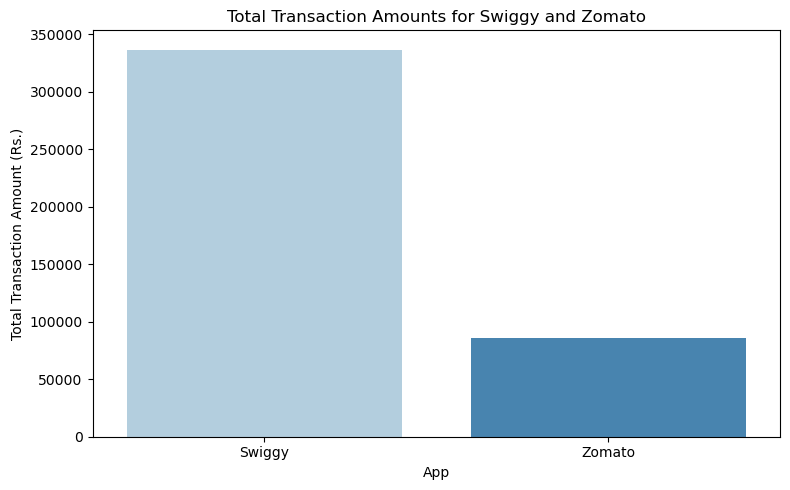

In [1012]:
# Aggregate the total transaction amount for each app (Swiggy and Zomato)
total_swiggy = combined_summary['SwiggyCredits'].sum() + combined_summary['SwiggyDebits'].sum()
total_zomato = combined_summary['ZomatoCredits'].sum() + combined_summary['ZomatoDebits'].sum()

# Data for the bar plot
app_data = {
    'App': ['Swiggy', 'Zomato'],
    'TotalTransaction': [total_swiggy, total_zomato]
}

# Create a DataFrame
app_df = pd.DataFrame(app_data)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x='App', y='TotalTransaction', data=app_df, palette='Blues')

# Adding titles and labels
plt.title('Total Transaction Amounts for Swiggy and Zomato')
plt.xlabel('App')
plt.ylabel('Total Transaction Amount (Rs.)')

# Display the plot
plt.tight_layout()
plt.show()

In [1013]:
# Extract transactions from the cleaned data
df_filtered[['TransactionType', 'Amount']] = df_filtered['cleaned_body'].apply(
    lambda sms: pd.Series(extract_transaction_details(sms))
)

# Filter bank-related messages using the keywords from earlier
bank_related = df_filtered[df_filtered['cleaned_sender'].str.contains(bank_keywords, case=False, na=False)]

# Aggregate transactions by user and bank
bank_summary = bank_related.groupby(['phoneNumber', 'senderAddress']).agg(
    TotalCredits=('Amount', lambda x: x[bank_related['TransactionType'] == 'credit'].sum()),
    TotalDebits=('Amount', lambda x: x[bank_related['TransactionType'] == 'debit'].sum()),
    TotalTransactions=('Amount', 'sum')
).reset_index()

# Find the bank with the highest transactions for each user
top_bank_per_user = bank_summary.loc[
    bank_summary.groupby('phoneNumber')['TotalTransactions'].idxmax()
]

# Sort the result by total transactions for better readability
top_bank_per_user = top_bank_per_user.sort_values(by='TotalTransactions', ascending=False)

# Display results
print(top_bank_per_user)

# Save to Excel for readability
top_bank_per_user.to_excel('user_highest_bank_transactions.xlsx', index=False)


  phoneNumber senderAddress  TotalCredits  TotalDebits  TotalTransactions
1  xx68843175        SBIUPI       4881.00         0.00            4881.00
3  xx69382284        SBIUPI       1266.00      2059.00            3325.00
7  xx80569279      BPiPaytm          0.00       500.00             500.00
0  xx52892129        CANBNK          0.00       320.00             320.00
4  xx75313460        CANBNK          0.00         0.00               0.00
5  xx80368198        ATMSBI          0.00         0.00               0.00


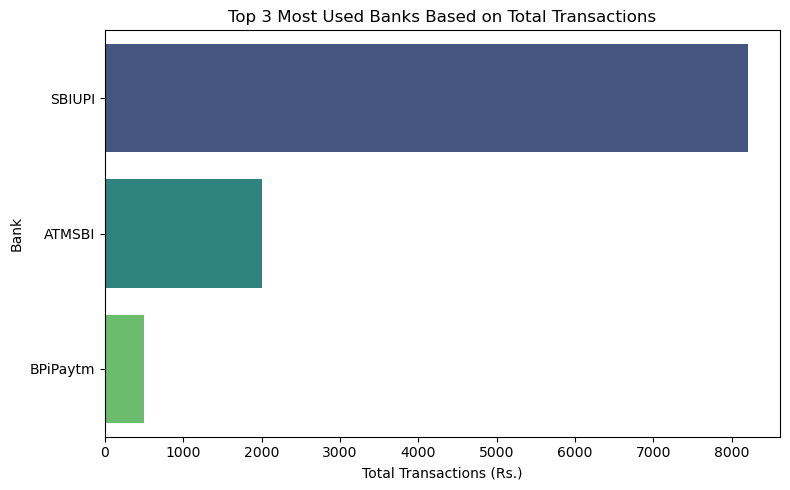

In [1014]:
# Aggregate total transactions for each bank (senderAddress)
bank_transaction_summary = bank_summary.groupby('senderAddress').agg(
    TotalTransactions=('TotalTransactions', 'sum')
).reset_index()

# Sort by total transactions and select the top 3
top_3_banks = bank_transaction_summary.sort_values(by='TotalTransactions', ascending=False).head(3)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x='TotalTransactions', y='senderAddress', data=top_3_banks, palette='viridis')

# Adding titles and labels
plt.title('Top 3 Most Used Banks Based on Total Transactions')
plt.xlabel('Total Transactions (Rs.)')
plt.ylabel('Bank')

# Display the plot
plt.tight_layout()
plt.show()


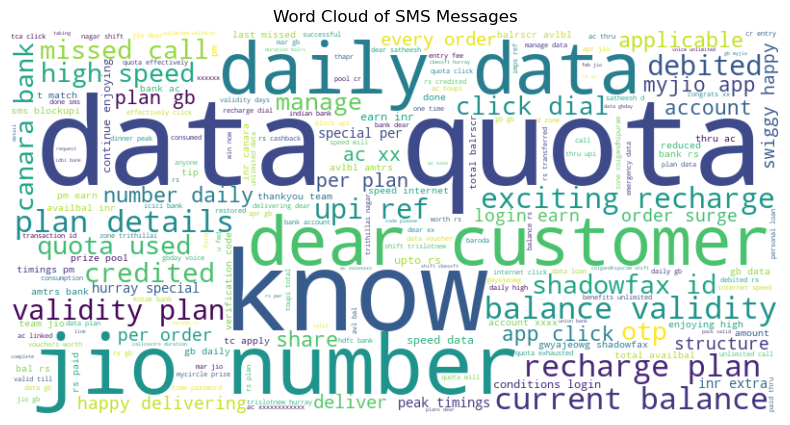

In [1015]:
# Step 4: Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cleaned_text))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of SMS Messages')
plt.show()

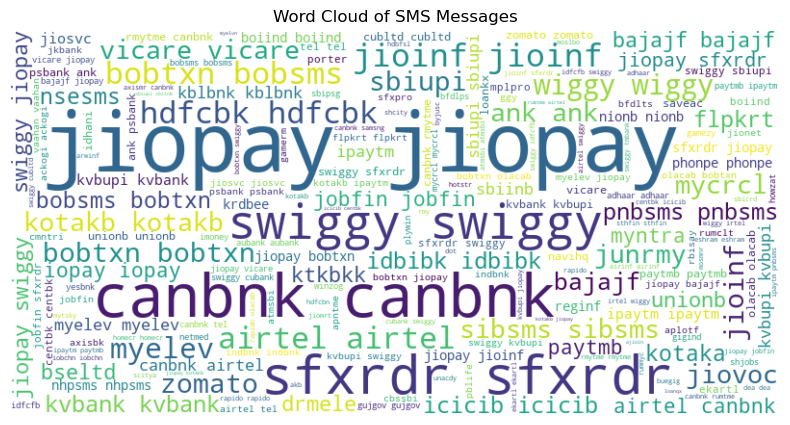

In [1016]:
# Step 4: Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_filtered['cleaned_sender']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of SMS Messages')
plt.show()

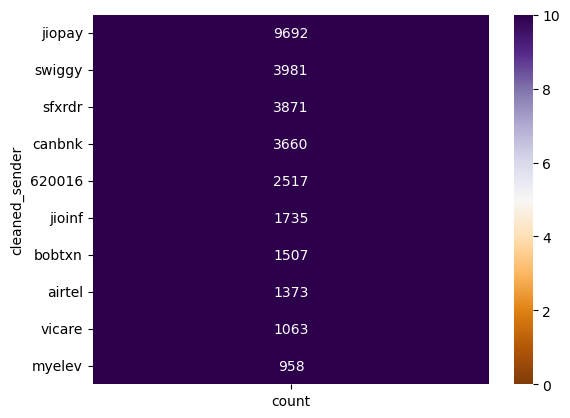

In [1017]:
sender_counts_reshaped = sender_counts.head(10).to_frame()

sns.heatmap(sender_counts_reshaped.head(10),vmin=0,vmax=10,cmap="PuOr",annot=True, fmt='g')

plt.show()

In [1018]:
# Step 5: Add Labels (improved labeling logic)
def label_message(text):
    spam_keywords = ["win", "offer", "free", "congratulations", "urgent", "lottery", "claim", "prize"]
    for word in spam_keywords:
        if word in text.lower():
            return 'spam'
    return 'not spam'

df_filtered['label'] = cleaned_text.apply(label_message)

In [1019]:
# Step 6: Train-Test Split
X = cleaned_text
y = df_filtered['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1020]:
# Step 7: Text Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [1021]:
# Step 8: Train a Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [1022]:
# Step 9: Evaluate the Model
y_pred = model.predict(X_test_tfidf)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    not spam       0.98      0.98      0.98     13295
        spam       0.87      0.87      0.87      1906

    accuracy                           0.97     15201
   macro avg       0.93      0.93      0.93     15201
weighted avg       0.97      0.97      0.97     15201


Confusion Matrix:
[[13052   243]
 [  242  1664]]


In [1023]:
# Step 10: Predict on New Messages
def categorize_message(message):
    processed_message = preprocess_text(message)
    vectorized_message = tfidf_vectorizer.transform([processed_message])
    return model.predict(vectorized_message)[0]

In [1024]:
# Example Usage
new_message = "Congratulations! You've won a free trip to Bahamas. Reply to claim your prize."
print(f"Message: '{new_message}'\nCategory: {categorize_message(new_message)}")

Message: 'Congratulations! You've won a free trip to Bahamas. Reply to claim your prize.'
Category: spam


# Spam Detection

In [1025]:
messages = [
    "Congratulations! You've won a free trip to Bahamas. Reply to claim your prize.",
    "URGENT: You are selected for a cash reward! Call now to claim.",
    "Get your exclusive discount offer. Limited time only!",
    "Hey, can we meet tomorrow for coffee? Let me know your schedule.",
    "Reminder: Your doctor’s appointment is scheduled for 10:00 AM on Monday.",
    "Happy Birthday! Hope you have an amazing day.",
]

for msg in messages:
    print(f"Message: '{msg}'\nCategory: {categorize_message(msg)}\n")


Message: 'Congratulations! You've won a free trip to Bahamas. Reply to claim your prize.'
Category: spam

Message: 'URGENT: You are selected for a cash reward! Call now to claim.'
Category: spam

Message: 'Get your exclusive discount offer. Limited time only!'
Category: spam

Message: 'Hey, can we meet tomorrow for coffee? Let me know your schedule.'
Category: not spam

Message: 'Reminder: Your doctor’s appointment is scheduled for 10:00 AM on Monday.'
Category: not spam

Message: 'Happy Birthday! Hope you have an amazing day.'
Category: not spam



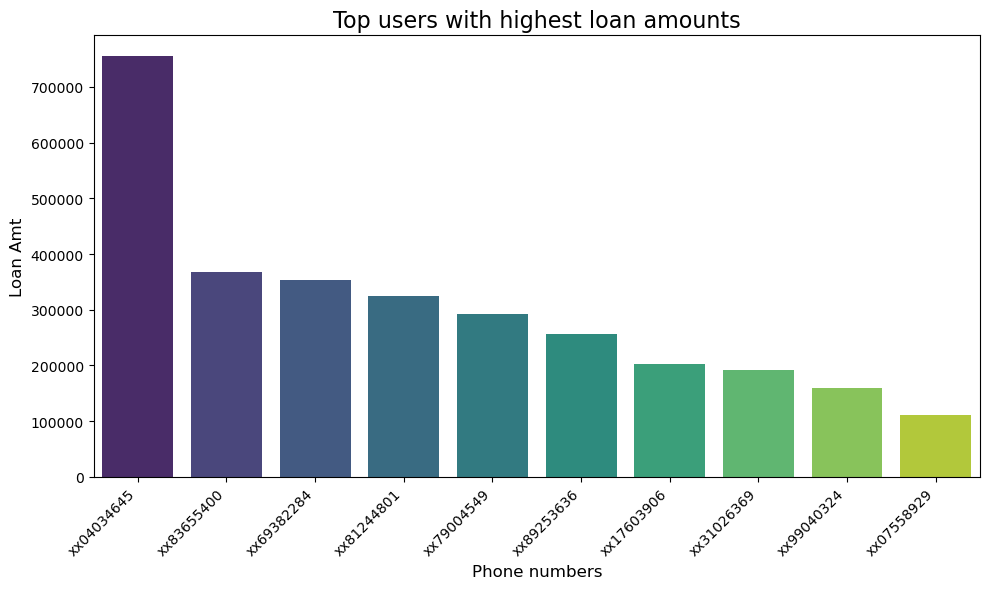

In [1026]:
# Assuming df_filtered is your cleaned data dataframe

plt.figure(figsize=(10, 6))
sns.barplot(x=top_loan_users["phoneNumber"].head(10), y=top_loan_users["loan_amount"].head(10), palette="viridis")
plt.title("Top users with highest loan amounts", fontsize=16)
plt.xlabel("Phone numbers", fontsize=12)
plt.ylabel("Loan Amt", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()

In [1027]:
# 2. Word Cloud for Bank-Related Messages
def plot_wordcloud_seaborn(text_data, title="Word Cloud"):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text_data))
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

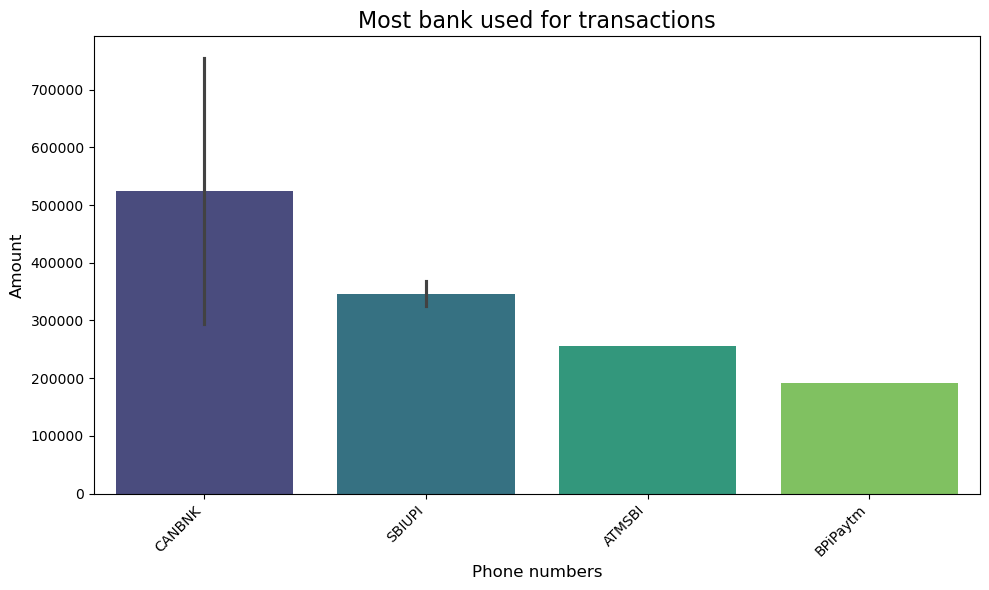

In [1028]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_bank_per_user["senderAddress"].head(10), y=top_loan_users["loan_amount"].head(10), palette="viridis")
plt.title("Most bank used for transactions", fontsize=16)
plt.xlabel("Phone numbers", fontsize=12)
plt.ylabel("Amount", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()

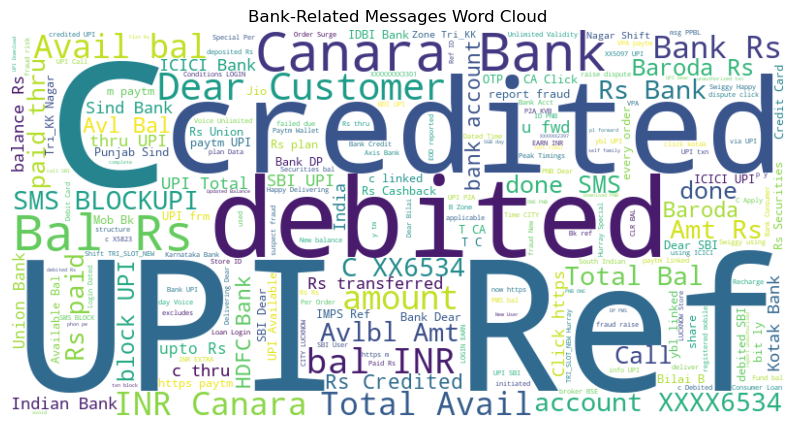

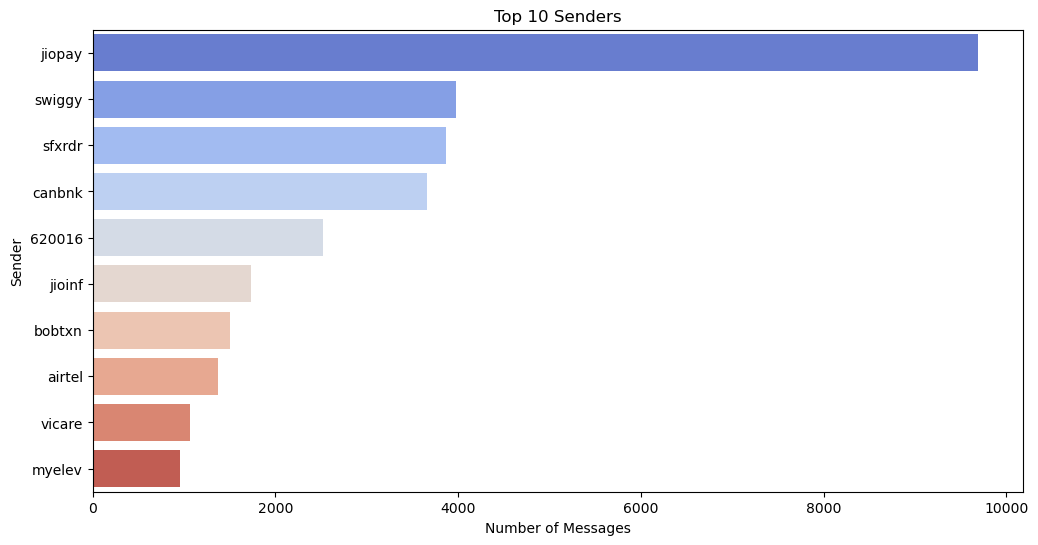

In [1029]:
# Filter bank-related messages for WordCloud visualization
bank_related_messages = df_filtered[df_filtered['IsBankRelated']]['cleaned_body']
plot_wordcloud_seaborn(bank_related_messages, title="Bank-Related Messages Word Cloud")

# 3. Senders Distribution (Using Seaborn Countplot)
def plot_sender_counts_seaborn(sender_data, title="Sender Distribution"):
    plt.figure(figsize=(12, 6))
    sns.countplot(y=sender_data, order=sender_data.value_counts().head(10).index, palette='coolwarm')
    plt.title(title)
    plt.xlabel('Number of Messages')
    plt.ylabel('Sender')
    plt.show()

plot_sender_counts_seaborn(df_filtered['cleaned_sender'], title="Top 10 Senders")